In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

AttributeError: partially initialized module 'pandas' has no attribute '_pandas_parser_CAPI' (most likely due to a circular import)

### Load earnings call data in the pickle file

In [6]:
with open('calls.pkl', 'rb') as f:
    calls_missing = pickle.load(f)

MemoryError: 

#### Data Structure (dataframe in a dictionary of dictionary)

In [4]:
print("First layer[keys] (sectors):", list(calls_missing.keys())[:5])
print("Second layer[keys] (company tickers and calls quarters):", list(calls_missing["automobiles"].keys())[:5])
print("Third layer[values] (precise time and transcript):")
calls_missing["automobiles"][('ADNT', '20172')]

First layer[keys] (sectors): ['automobiles', 'banks', 'capital-goods', 'commercial-services', 'consumer-durables']
Second layer[keys] (company tickers and calls quarters): [('ADNT', '20172'), ('ADNT', '20173'), ('ADNT', '20174'), ('ADNT', '20181'), ('ADNT', '20182')]
Third layer[values] (precise time and transcript):


,1,2
2017,2017-04-28 17:00:00,"Operator: Welcome, and thank you all for stand..."


In [66]:
# Sample transcript
print(calls_missing["automobiles"][('ADNT', '20172')].iloc[0,1][:30000])

Operator: Welcome, and thank you all for standing by. [Operator Instructions] This call is being recorded. If you have any objections, you may disconnect at this point. Now I'll turn the meeting over to Mark Oswald. Sir, you may now begin.
Mark Oswald: Thank you, Ivy. Good morning, and thank you for joining us as we review Adient's results for the second quarter of fiscal 2017. The press release and presentation slides for our call today have been posted to the Investor Section of our Web site at Adient.com. This morning, I'm joined by Bruce McDonald, our Chairman and Chief Executive Officer; and Jeff Stafeil, our Executive Vice President and Chief Financial Officer. On today's call, Bruce will provide a few opening remarks followed by Jeff, who will review the financial results in greater detail. At the conclusion of Jeff's comments, we will open the call to your questions. Before I turn the call over to Bruce and Jeff, there are a few items I would like to cover. First, today's confe

The number of unique company: 1831
The range of date (approximated years) earning calls covered: 18.25


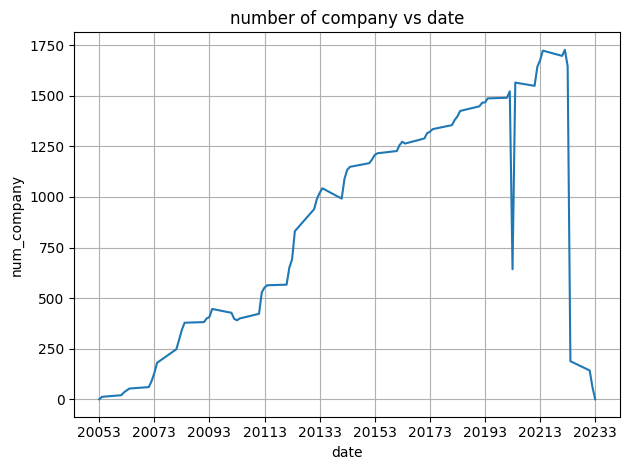

In [11]:
# Find the range of date and number of companies in this dataset
date_available = {}
unique_company = set()
for sector in list(calls_missing.keys()):
    for key in calls_missing[sector]:
        unique_company.add(key[0])
        if key[1] not in date_available:
            date_available[key[1]] = 1
        else:
            date_available[key[1]] += 1
date_available = dict(sorted(date_available.items()))
print("The number of unique company:", len(unique_company))
print("The range of date (approximated years) earning calls covered:", len(date_available)/4)

date = [int(date) for date in list(date_available.keys())]
num_company = list(date_available.values())
plt.plot(date, num_company)
plt.xlabel("date")
plt.ylabel("num_company")
plt.title("number of company vs date")
plt.xticks(date[::8])
plt.tight_layout()
plt.grid()

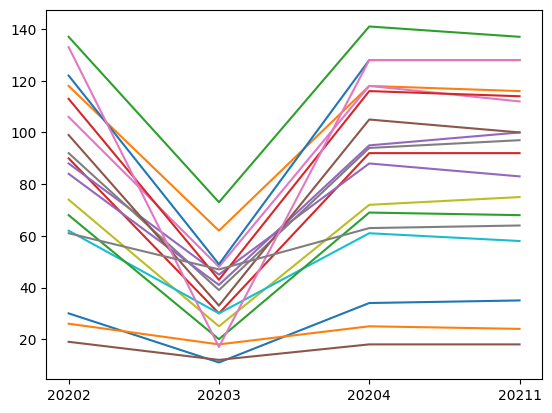

In [20]:
d = {}
for sector in calls_missing:
    d[sector] = {}
    for key in calls_missing[sector]:
        if int(key[1]) > 20201 and int(key[1]) < 20212:
            if key[1] not in d[sector]:
                d[sector][key[1]] = 1
            else:
                d[sector][key[1]] += 1
    d[sector] = dict(sorted(d[sector].items()))

for sector in d:
    plt.plot(list(d[sector].keys()), list(d[sector].values()))


### Shrink the Dataset to Desired Range (2010 - 2016)
#### Distribution of Call Date

The number of unique company: 1831


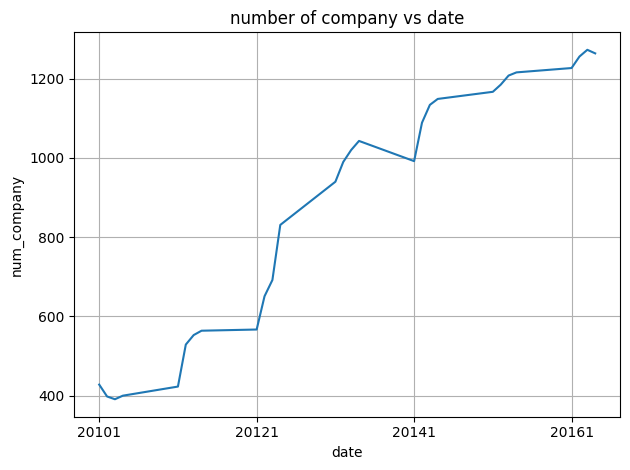

In [24]:
new_date = {}
unique_company = set()
for sector in list(calls_missing.keys()):
    for key in calls_missing[sector]:
        unique_company.add(key[0])
        if int(key[1]) >= 20101 and int(key[1]) <= 20164:
            if key[1] not in new_date:
                new_date[key[1]] = 1
            else:
                new_date[key[1]] += 1
new_date = dict(sorted(new_date.items()))
print("The number of unique company:", len(unique_company))

date = [int(date) for date in list(new_date.keys())]
num_company = list(new_date.values())
plt.plot(date, num_company)
plt.xlabel("date")
plt.ylabel("num_company")
plt.title("number of company vs date")
plt.xticks(date[::8])
plt.tight_layout()
plt.grid()

In [3]:
calls_missing.keys()

dict_keys(['automobiles', 'banks', 'capital-goods', 'commercial-services', 'consumer-durables', 'consumer-retailing', 'consumer-services', 'diversified-financials', 'energy', 'food-beverage-tobacco', 'healthcare', 'household', 'insurance', 'materials', 'media', 'pharmaceuticals-biotech', 'real-estate', 'retail'])

### Creating a Data Frame
#### With column: company, sector, year, quarter, date, transcript

In [62]:
# len(calls_missing["automobiles"])
x = "hi"
z = 5*[x]
y = []
y = y+z
y = y+z
y

['hi', 'hi', 'hi', 'hi', 'hi', 'hi', 'hi', 'hi', 'hi', 'hi']

In [2]:
company = []
ss = []
year = []
quarter = []
date = []
transcript = []

for sector in list(calls_missing.keys()):
    s = len(calls_missing[sector])*[sector]
    ss = ss + s
    for key in calls_missing[sector]:
       company.append(key[0])
       year.append(key[1][:-1])
       quarter.append(key[1][-1])
       date.append(calls_missing[sector][key].iloc[0,0])
       transcript.append(calls_missing[sector][key].iloc[0,1])

NameError: name 'calls_missing' is not defined

In [72]:
data = {}
data["company"] = company
data["sector"] = ss
data["year"] = year
data["quarter"] = quarter
data["date"] = date
data["transcript"] = transcript

df_calls = pd.DataFrame(data)
df_calls.head()

,company,sector,year,quarter,date,transcript
0,ADNT,automobiles,2017,2,2017-04-28 17:00:00,"Operator: Welcome, and thank you all for stand..."
1,ADNT,automobiles,2017,3,2017-07-27 17:00:00,"Operator: Welcome, and thank for standing by. ..."
2,ADNT,automobiles,2017,4,2017-11-05 17:00:00,"Operator: Welcome, and thank you for standing ..."
3,ADNT,automobiles,2018,1,2018-01-29 17:00:00,"Operator: Welcome, and thank you for joining t..."
4,ADNT,automobiles,2018,2,2018-05-03 17:00:00,"Operator: Welcome, and thank you all for stand..."


In [73]:
# df_calls.to_csv('calls.csv')

In [1]:
trunc_date = [d[:10] for d in date]
# df_merge_rating = pd.DataFrame({"company":company, "date": trunc_date})
# df_merge_rating.head()

NameError: name 'date' is not defined